In [14]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

tweets  = pd.read_csv('tweets.csv')

# remove @ and # 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# remove twitter handles (@user)
tweets['remove_rate_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets['remove_rate_tweet'].head(10)

0    b'Download our latest brochure to learn how EP...
1    b'In this blog, we share an extensive guide to...
2    b'#LiquidityManagement is undergoing seismic c...
3    b'This year, EPAM partnered with the Message o...
4    b'At #BioProcess International US 2019,  inter...
5    b'., Head of Google Competency at EPAM, shares...
6    b'We\xe2\x80\x99re happily reflecting on our t...
7    b'Having a strong #WorkforceManagement and pla...
8    b'The holiday season is here! Take a look at o...
9    b'EPAM has a proven track record of creating e...
Name: remove_rate_tweet, dtype: object

In [2]:
# remove special characters, numbers, punctuations
tweets['remove_rate_tweet'] = tweets['remove_rate_tweet'].str.replace("[^a-zA-Z#]", " ")
tweets['remove_rate_tweet'].head(10)

0    b Download our latest brochure to learn how EP...
1    b In this blog  we share an extensive guide to...
2    b #LiquidityManagement is undergoing seismic c...
3    b This year  EPAM partnered with the Message o...
4    b At #BioProcess International US        inter...
5    b    Head of Google Competency at EPAM  shares...
6    b We xe  x   x  re happily reflecting on our t...
7    b Having a strong #WorkforceManagement and pla...
8    b The holiday season is here  Take a look at o...
9    b EPAM has a proven track record of creating e...
Name: remove_rate_tweet, dtype: object

In [3]:
# removing short words len less thn 3

tweets['remove_rate_tweet'] = tweets['remove_rate_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets['remove_rate_tweet'].head(10)

0    Download latest brochure learn EPAM Cloud Pipe...
1    this blog share extensive guide loyalty progra...
2    #LiquidityManagement undergoing seismic change...
3    This year EPAM partnered with Message Hope Fou...
4    #BioProcess International interviewed EPAM Jef...
5    Head Google Competency EPAM shares with Anthos...
6    happily reflecting time Automotive Europe look...
7    Having strong #WorkforceManagement planning to...
8    holiday season here Take look infographic lear...
9    EPAM proven track record creating enterprise l...
Name: remove_rate_tweet, dtype: object

In [4]:
#splitting the words using tokens

tokenized_tweet = tweets['remove_rate_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Download, latest, brochure, learn, EPAM, Clou...
1    [this, blog, share, extensive, guide, loyalty,...
2    [#LiquidityManagement, undergoing, seismic, ch...
3    [This, year, EPAM, partnered, with, Message, H...
4    [#BioProcess, International, interviewed, EPAM...
Name: remove_rate_tweet, dtype: object

In [5]:
'''
# Not using stemming because it is not efficient in considering the words
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(10)
'''

'\n# Not using stemming because it is not efficient in considering the words\nfrom nltk.stem.porter import *\nstemmer = PorterStemmer()\n\ntokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming\ntokenized_tweet.head(10)\n'

In [6]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['remove_rate_tweet'] = tokenized_tweet


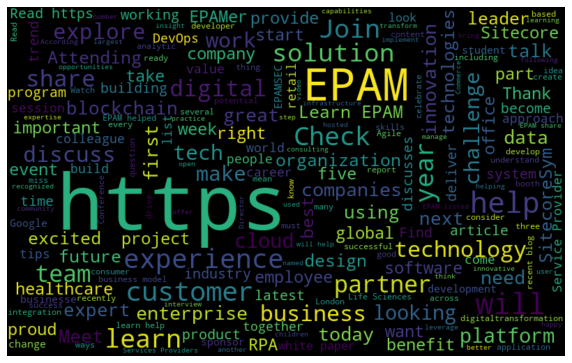

In [7]:
all_words = ' '.join([text for text in tweets['remove_rate_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [9]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
HT_regular = hashtag_extract(tweets['remove_rate_tweet'])
HT_regular = sum(HT_regular,[])

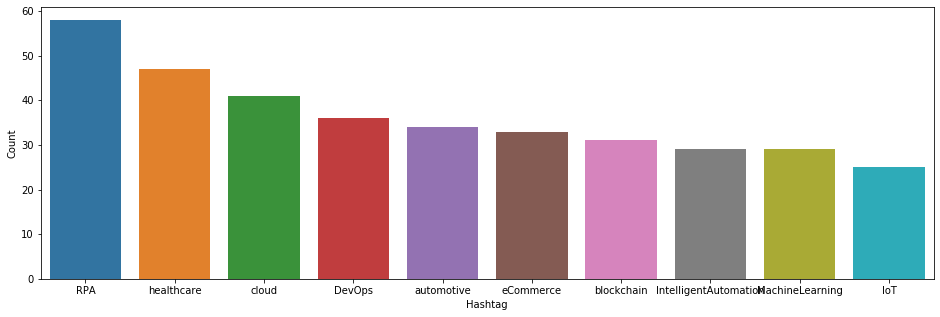

In [18]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(tweets['remove_rate_tweet'])